# Non-Linear Models and Validation Metrics 


### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression 

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input 

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [2]:
# TO DO: Import concrete dataset from yellowbrick library

from yellowbrick.datasets import load_concrete

X,y = load_concrete()

### Step 2: Data Processing

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

### Step 5: Visualize Results 

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [3]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
#1. 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
 
DT_model = DecisionTreeRegressor(max_depth = 5, random_state=0)
#DT_model.fit(X_train, y_train)

RF_model = RandomForestRegressor(max_depth = 5, random_state=0)
#RF_model.fit(X_train, y_train)

GB_model = GradientBoostingRegressor(max_depth = 5, random_state=0)
#GB_model.fit(X_train, y_train)

results = pd.DataFrame(columns=["Training accuracy", "Validation accuracy"])
models= [DT_model,RF_model, GB_model]

#use X_train so test can be used for confusion metrics 
for model in models:
    scores = cross_validate(model, X_train, y_train, cv=5, 
                            scoring='neg_mean_squared_error',
                        return_train_score=True)
    train_score = scores['train_score'].mean()*-1
    validation_score = scores['test_score'].mean()*-1
    results.loc[len(results)]= [train_score, validation_score]


pd.set_option('display.precision', 2)
results.index = ["DT", "RF", "GB"]
print("Mean Squared Error")
display(results)


Mean Squared Error


,Training accuracy,Validation accuracy
DT,47.28,73.45
RF,29.58,45.05
GB,3.38,22.82


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [4]:
# TO DO: ADD YOUR CODE HERE

models= [DT_model,RF_model, GB_model]
results_r2 = pd.DataFrame(columns=["Training accuracy", "Validation accuracy"])
for model in models:
    scores2 = cross_validate(model, X_train, y_train, cv=5, 
                            scoring='r2',
                        return_train_score=True)
    train_score2 = scores2['train_score'].mean()
    validation_score2 = scores2['test_score'].mean()
    results_r2.loc[len(results_r2)]= [train_score2, validation_score2]


pd.set_option('display.precision', 2)
results_r2.index = ["DT", "RF", "GB"]
print("r2 Score")
display(results_r2)
print("Mean Squared Error")
display(results)

r2 Score


,Training accuracy,Validation accuracy
DT,0.83,0.74
RF,0.90,0.84
GB,0.99,0.92


Mean Squared Error


,Training accuracy,Validation accuracy
DT,47.28,73.45
RF,29.58,45.05
GB,3.38,22.82


### Questions 
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
2. Out of the models you tested, which model would you select for this dataset and why?
3. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

*ANSWER HERE*

1. 
Linear model results:  MSE train 111.36,	MSE Validation 95.90, R2 train 0.61, R2 Validation 0.62. 
    The linear model had a greater MSE and lower accuracy then nonlinear models. Linear model was underfitting the dataset with (low variance and high bias), the model wasn't complex enough. 

Using non-linear model : 
    Overall, the non linear tree based models resulted in higher training accuracy (0.83, 0.9, 0.99) and higher validations score(0.74, 0.84, 0.92), smaller mean squared error then the linear model. The tree based models have high variance and low bias, overfitting the dataset. 

The dataset is more suited for a non-linear model which is evident through the results as we want smallest MSE and r2 score close to 1.


2. I would select the gradiant boosting regressor because it has the highest training(0.99) and validation(0.92) r2 score. Also, the mean squared error is the lowest for this model for both training MSE(3.38) and validation MSE (22.82). We want r2 score to be closest to 1 and smallest mean squared error - which is achieved by the gradiant boosting regressor. This model generalizes the data well and also would be able to predict unseen data. 

3. To increase the validation accuracy we would need to make the model less complex since they are overfitting(high variance, low bias):
    - pre-pruning by reducing the maximum depth 
    - create more trees, increasing n_estimator for random forest 
    - use smaller max_features 


### Process Description 
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*
1. I referred to assignment 2 solutions as well as Decision tree example juptyer notebook for code sourcing. 
2. I reviewed the notes. Then, I attempted the question in the order presented while referring to class material. 
3. I didn't use generative AI for this section. 
4. I didn't have any challenges and what helped was reading through class material first before starting the assignment. 

## Part 2: Classification 

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [5]:
# TO DO: Import wine dataset

data = pd.read_csv("wine.data",na_values='?', names=["class","Alcohol", "Malic acid", "Ash",
                                    "Alcalinity of ash","Magnesium", 
                                    "Total phenols", "Flavanoids","Nonflavanoid phenols", 
                                    "Proanthocyanins","Color intensity", 
                                    "Hue","OD280/OD315 of diluted wines","Proline"])

#data.info()
X = data.drop(columns = 'class')
y = data['class']

print("Size of X is {} and  Size of y is {}".format(X.shape, y.shape))
print("\nType of X is {} \nType of y is {}".format(type(X), type(y)))


Size of X is (178, 13) and  Size of y is (178,)

Type of X is <class 'pandas.core.frame.DataFrame'> 
Type of y is <class 'pandas.core.series.Series'>


### Step 2: Data Processing 

Print the first five rows of the dataset to inspect:

In [6]:
# TO DO: ADD YOUR CODE HERE
data.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [7]:
# TO DO: ADD YOUR CODE HERE
data.isnull().sum()

#no missing values 

class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

How many samples do we have of each type of wine?

In [8]:
# TO DO: ADD YOUR CODE HERE

""" data_2 = data.groupby(by= "class").count().Alcohol
data_2.iloc[0]
display(data_2)
y.value_counts()[type] - another way to do it 
print("Class 1 has {}, Class 2 has {} and Class 3 has {} samples".format(data_2.iloc[0], data_2.iloc[1], data_2.iloc[2])) """

type_wine = set(y.values)

for type in type_wine: 
    print("Class {} has {} samples". format(type,(y==type).sum()))
    

Class 1 has 59 samples
Class 2 has 71 samples
Class 3 has 48 samples


### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

### Step 5: Visualize Results 

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [9]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
#stratify=y
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

DTC_model = DecisionTreeClassifier(max_depth = 3, random_state=0)
DTC_model.fit(X_train, y_train)

svc_model = SVC()
#svc_model.fit(X_train, y_train)


results = pd.DataFrame(columns=["Data Size X","Data Size y","Training accuracy", "Validation accuracy"])
models= [DTC_model, svc_model]

for model in models:
    scores = cross_validate(model, X_train, y_train, cv=5, 
                            scoring='accuracy',
                        return_train_score=True)
    train_score = scores['train_score'].mean()
    validation_score = scores['test_score'].mean()
    results.loc[len(results)]= [X_train.shape, y_train.shape, train_score, validation_score]


pd.set_option('display.precision', 2)
results.index = ["DTC","SVC"]
print("Accuracy Score")
display(results)


Accuracy Score


,Data Size X,Data Size y,Training accuracy,Validation accuracy
DTC,"(133, 13)","(133,)",0.97,0.87
SVC,"(133, 13)","(133,)",0.71,0.68


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [10]:
# TO DO: Implement best model 
from sklearn.metrics import confusion_matrix
y_pred = DTC_model.predict(X_test)
mat = confusion_matrix(y_test, y_pred)

#best model: Decision Tree Model 
#y_pred = cross_val_predict(DTC_model, X, y)


Text(145.22222222222229, 0.5, 'true value')

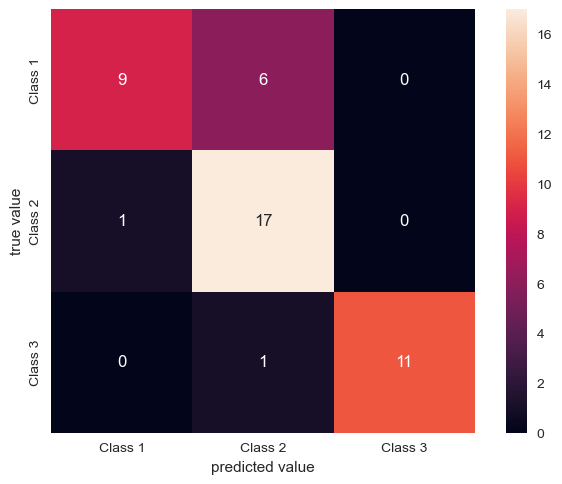

In [11]:
# TO DO: Print confusion matrix using a heatmap
labels=['Class 1','Class 2', 'Class 3']

import seaborn as sns
sns.heatmap(mat,xticklabels=labels,  yticklabels=labels, square=True, annot=True)
plt.xlabel('predicted value')
plt.ylabel('true value')


In [12]:
# TO DO: Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, 
                            target_names=labels, zero_division=0))

              precision    recall  f1-score   support

     Class 1       0.90      0.60      0.72        15
     Class 2       0.71      0.94      0.81        18
     Class 3       1.00      0.92      0.96        12

    accuracy                           0.82        45
   macro avg       0.87      0.82      0.83        45
weighted avg       0.85      0.82      0.82        45



### Questions 
1. How do the training and validation accuracy change depending on the method used? Explain with values.
2. What are two reasons why the support vector machines model did not work as well as the tree-based model?
3. How many samples were incorrectly classified in step 5.2? 
4. In this case, is maximizing precision or recall more important? Why?

*YOUR ANSWERS HERE*

1. Decision tree classifier has a very high training accuracy (0.97) and a validation score of 0.87. There is high variance and low bias so this model overfits the data. The training accuracy is almost 1 which means the model is complex and likely memorizes the data. 
The support vector classifier results in low training and validation accuracy with low variance as the values are about the same of 0.71 & 0.68. This indicates that the model is underfitting and not complex enough.

2. The support vector machine model didn't work as well since this model requires careful preprocessing of data(scaling) and tuning of the parameters. No parameters were specified. Specifying the C and gamma hyperparameter could help make this model perform better. 

3. Samples incorrectly classified are 8 samples.  
6(classified as class 2 but class 1) + 1(classfied as class 2 but class 3)+ 1(classfied as class 1 but class 2) = 8. 

4. Precision indicates that we have no false positives. Recall indicates we have no false negatives. In this case, it doesn't matter as much which value we maximize since classifyling three different types of wine is low stakes. 

precision : how many predicted positive are actually positive : TP/TP+FP
recall: how many actual positives did we catch TP/TP+FN


### Process Description 
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*
1. I sourced my code from the class examples - the jupyter notbook for decision trees. 
2. I reviewed the notes, attempted the assignment in the steps provided and then referred to notes if I got stuck. 
3. I didn't use generative AI. 
4. I had a bit of challenge loading the dataset. I was getting parse errors and then errors because the file was not in the folder directly. 
Once I figured out the problem, there were no other challenges 

## Part 3: Observations/Interpretation 

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*

Discussed in lectures: 
Main drawback of decision trees is that they tend to overfit the training data. Ensembles of decision trees 
reduce the amount of overfitting by averaging the trees and for gradient boosting. 

For classification, SVM require tuning and scaling of data to perform well.  

Regression: 

Decision Tree resulted in high variance and low bias (training: 0.83, validation: 0.74), the model is overfitting too complex. Low validation score.

Random forest model resulted in a higher traning accuracy (0.9) and higher validation accuracy (0.84) in comparison to Decision Tree model . The increase in validation accuracy is due to using many decision trees and averaging them. 

Gradient Boosting model resulted in highest training accuracy (0.99) and highest validation accuracy (0.92) and lowest MSE in comparison to two other models. This model had the best results as it uses many trees and corrects the mistakes of the tree built before in series. 

Overall, results agree with the theory learned in class.  

Classification: 

- Decision tree classifier has a very high training accuracy (0.97) and a high validation score of 0.87. There is high variance and low bias so this model overfits the data. 
- SVC resulted in low training(0.71) and validation accuracy(0.68) with low variance as the values are about the same. This indicates that the model is underfitting and is too simple. Model didn't perform as well, its not able to generalize or predict unseen data( makes mistakes). SVC can be improved by tuning parameters and scaling data. 



## Part 4: Reflection 
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

I liked that the assignment is split into steps and that it is in juptyer notebook. This makes it easier to execute what is being asked and visualizing the results of the code
in segments has helped with understanding the content better. 

I found it interesting to read about the datasets and the features that are being used. Some of the questions wording can be confusing or hard to decipher what is being asked. For example, at first I interrupted data size as the total number of data samples but realized it was asking for the shape. 

## Part 5: Bonus Question 

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [13]:
# TO DO: ADD YOUR CODE HERE
from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC

linear_svm = LinearSVC(max_iter = 5000)
scores = cross_validate(linear_svm, X_train, y_train, cv=5, 
                        scoring='accuracy',
                    return_train_score=True)
train_score = scores['train_score'].mean()
validation_score = scores['test_score'].mean()
print("Train score = {} \n Validation score = {}".format(train_score, validation_score))

/Users/mehreen/anaconda3/envs/ensf-ml/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/mehreen/anaconda3/envs/ensf-ml/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mehreen/anaconda3/envs/ensf-ml/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/mehreen/anaconda3/envs/ensf-ml/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mehreen/anaconda3/envs/ensf-ml/lib/python3.10/site-packages/sklearn/svm/_classes.py

Train score = 0.9247928055016752 
 Validation score = 0.8874643874643875


/Users/mehreen/anaconda3/envs/ensf-ml/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


*ANSWER HERE*

LinearSVC results : Train_score: 0.91, validation score = 0.86. 
Part 2 SVC result : Train_score: 0.71, validation score = 0.68.

LinearSVC model performed better than the SVC model in part 2. The training and validation accuracy are a lot higher and closer to 1 in comparison. Therefore, using LinearSVC did improve the results ( 0.71 to 0.91 for training ) and (0.68 to 0.86 for validation score) both scores increased. The model is better at generalizing the data and predicting unseen data. This is because the data needs scaling so a linear model would perform better then a SVM model. 

LinearSVC is not a good fit for this data becuase the maximum iteration is reached. 